# Setting up a custom model
In principle, any custom model can be used in ALPro. This tutorial allows shows how to set up a model with any given profile of magnetic field and density without using ALPro's inbuilt models. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

In [2]:
s = alpro.Survival("custom")

There are two ways to set up a custom model. Minimally, ALPRO needs a domain instance initialised, and then the following variables need to be initialised:
* ne: the electron density
* B: the perpendicular magnetic field 
* phi: the angle the magnetic field vector makes with the $y$ axis
* deltaL: the size of each domain

So one can easily just specify these manually, for example...

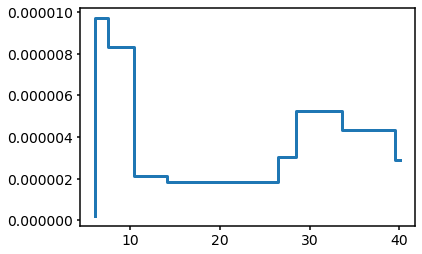

In [3]:
np.random.seed(42)
s.initialise_domain()
s.domain.ne = np.random.random(size=10) * 0.01 
s.domain.B = np.random.random(size=10) * 1e-5
s.domain.deltaL = np.random.random(size=10) * 10.0
redge = np.cumsum(s.domain.deltaL)
s.domain.phi = np.random.random(size=10) * 2.0 * np.pi
_ = plt.step(redge, s.domain.B, where="pre")

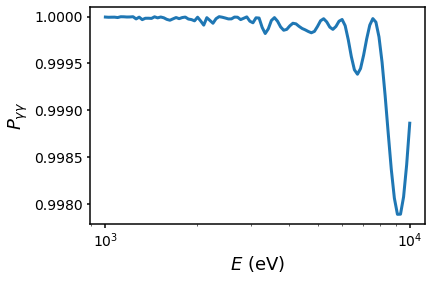

In [4]:
energies = np.logspace(3,4,100)
s.set_params(g = 1e-12 * 1e-9, mass = 1e-11)
s.propagate(energies=energies, pol="y")
fig = s.default_plot(mode="survival")